In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as mlp
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

https://www.kaggle.com/datasets/thedrcat/daigt-v4-train-dataset/data?select=train_v4_drcat_01.csv

In [2]:
df = pd.read_csv("/Users/thorkildkappel/Desktop/4. sem/Soc cult-paper/archive/train_v4_drcat_01.csv")

In [3]:
df.head(5)

,text,label,prompt_name,source,RDizzl3_seven,model
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,human
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,human
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,human
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False,human
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False,human


Explore data


In [4]:
print(df["label"].nunique())
print(df["prompt_name"].nunique())
print(df["source"].nunique())
print(df["model"].nunique())

2
15
29
12


In [5]:
Human_counter = 0
LLM_counter = 0

lst = []

for i in df["label"]:
    if i == 0:
        Human_counter += 1
    elif i == 1:
        LLM_counter += 1

lst.append(Human_counter)
lst.append(LLM_counter)


([<matplotlib.patches.Wedge at 0x295d0f6d0>,
 [Text(0.4304745171376061, 1.0122705617052907, ''),
  Text(-0.4304745171376065, -1.0122705617052907, '')])

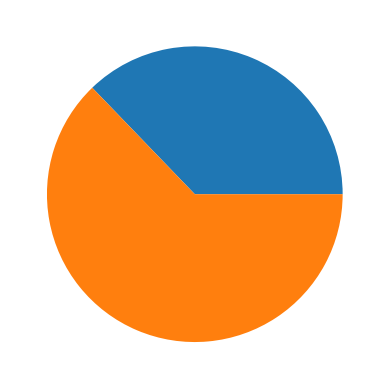

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(lst)

In [7]:
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
vectorizer = TfidfVectorizer(max_features= 150000)

X_train = vectorizer.fit_transform(X_train)


In [9]:
X_test = vectorizer.transform(X_test)




In [10]:
LR = LogisticRegression()
LR.fit(X_train, y_train)


LogisticRegression()

In [11]:
predicted = LR.predict(X_test)

print(len(predicted))
print(len(y_test))

22072
22072


In [12]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predicted)
confusion_matrix


array([[ 8030,   280],
       [  552, 13210]])

Plots:

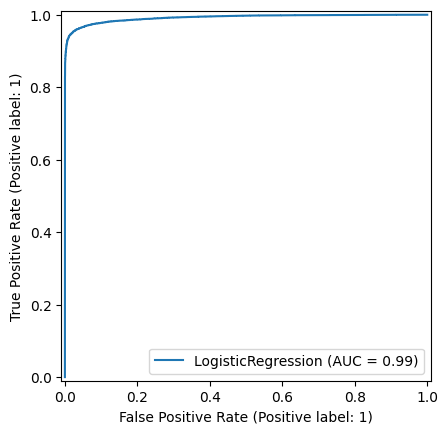

In [28]:
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, _ = roc_curve(y_test, predicted, pos_label=1)
roc_display = RocCurveDisplay.from_estimator(LR, X_test, y_test)

plt.savefig('/Users/thorkildkappel/Desktop/4. sem/Soc cult-paper/archive/roc_auc.png')